In [1]:
print("HELLO")
import torch
import torch.distributions as dist
import os
import numpy as np
from PIL import Image
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision.utils as vutils
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

HELLO


In [2]:
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")

In [3]:
downsample_transform = transforms.Compose([

    transforms.Resize((128,128)),

    transforms.ToTensor()              

    ])

In [4]:
train_dataset = datasets.ImageFolder('./afhq/train/',downsample_transform)

test_dataset = datasets.ImageFolder('./afhq/val/',downsample_transform)

print(f"Train data:\n\n{train_dataset}\n\n\n\nTest data:\n\n{test_dataset}")

Train data:

Dataset ImageFolder
    Number of datapoints: 14630
    Root location: ./afhq/train/
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )



Test data:

Dataset ImageFolder
    Number of datapoints: 1500
    Root location: ./afhq/val/
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )


In [6]:
train_dataloader = DataLoader(dataset=train_dataset,batch_size=64,shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,batch_size=64)

tensor([[0.5059, 0.5059, 0.4980,  ..., 0.5725, 0.5490, 0.5020],
        [0.5020, 0.5059, 0.5020,  ..., 0.5608, 0.5294, 0.4941],
        [0.5020, 0.5059, 0.5020,  ..., 0.5412, 0.5137, 0.4824],
        ...,
        [0.6431, 0.6314, 0.6157,  ..., 0.0784, 0.0510, 0.0275],
        [0.6510, 0.6510, 0.6510,  ..., 0.0863, 0.0588, 0.0392],
        [0.6471, 0.6588, 0.6549,  ..., 0.0980, 0.0784, 0.0510]])


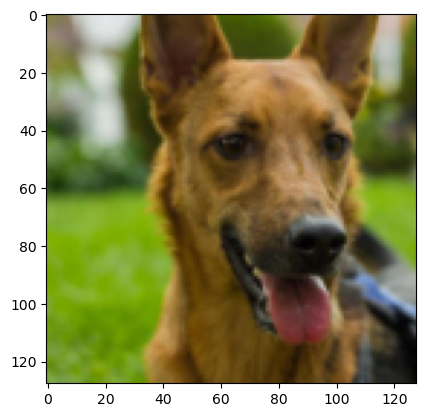

In [11]:
for i in train_dataloader:
    x = i[0][0]
    break
print(x[1])
plt.imshow(np.transpose(x, (1,2,0)))

In [7]:
"""
class VAE_Encoder(nn.Module):
    def __init__(self , output_dim , img_size):
        super(VAE_Encoder, self).__init__()
        self.n_components = 0
        self.output_dim = output_dim
        self.img_size = img_size

        # First Layer ######
        self.conv1 = nn.Conv2d(3 , 16 , 3)
        self.pool1 = nn.MaxPool2d(3,2)

        ## Second layer ###
        self.conv2 = nn.Conv2d(16 , 32 , 3)
        self.pool2 = nn.MaxPool2d(3,2)

        self.fc = nn.Linear( 26912 , 512)

        self.mu = nn.Linear(512 , 128)
        self.sigma = nn.Linear(512 , 128)


    def forward(self , x):
        #print("HELLO")

        x = self.conv1(x)
        #print("AFTER ")
        x = self.pool1(x)
        #print('AFter 1')
        x = self.conv2(x)
        #print('AFTER 2')
        x = self.pool2(x)
        
        x = x.view(x.size(0), -1)

        #print(x)
        x = self.fc(x)
        mu = self.mu(x)
        sigma = self.sigma(x)
        #rint('AFTER 5')
        return mu , sigma
        """

'\nclass VAE_Encoder(nn.Module):\n    def __init__(self , output_dim , img_size):\n        super(VAE_Encoder, self).__init__()\n        self.n_components = 0\n        self.output_dim = output_dim\n        self.img_size = img_size\n\n        # First Layer ######\n        self.conv1 = nn.Conv2d(3 , 16 , 3)\n        self.pool1 = nn.MaxPool2d(3,2)\n\n        ## Second layer ###\n        self.conv2 = nn.Conv2d(16 , 32 , 3)\n        self.pool2 = nn.MaxPool2d(3,2)\n\n        self.fc = nn.Linear( 26912 , 512)\n\n        self.mu = nn.Linear(512 , 128)\n        self.sigma = nn.Linear(512 , 128)\n\n\n    def forward(self , x):\n        #print("HELLO")\n\n        x = self.conv1(x)\n        #print("AFTER ")\n        x = self.pool1(x)\n        #print(\'AFter 1\')\n        x = self.conv2(x)\n        #print(\'AFTER 2\')\n        x = self.pool2(x)\n        \n        x = x.view(x.size(0), -1)\n\n        #print(x)\n        x = self.fc(x)\n        mu = self.mu(x)\n        sigma = self.sigma(x)\n        #r

In [8]:

class VAE_Encoder(nn.Module):
    def __init__(self , output_dim , img_size):
        super(VAE_Encoder, self).__init__()
        self.n_components = 0
        self.output_dim = output_dim
        self.img_size = img_size

        self.encoder = torch.nn.Sequential(
            nn.Conv2d(3, 8, kernel_size= 3, stride= 1, padding  = 1),
            nn.BatchNorm2d(8),
            nn.LeakyReLU(),
            nn.Conv2d(8, 16, kernel_size= 3, stride= 2, padding  = 1),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.Conv2d(16, 32, kernel_size= 3, stride= 2, padding  = 1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(),
            nn.Conv2d(32, 64, kernel_size= 4, stride= 2, padding  = 1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(),
            nn.Conv2d(64,64,kernel_size=4,stride=2,padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU()
        )

        self.mu = torch.nn.Linear(4096, 256)
        self.sigma = torch.nn.Linear(4096, 256)
        #self.N = torch.distributions.Normal(0, 1)
        #self.z_back = torch.nn.Linear(30, 8192)


    def forward(self , x):
        #print(x)
        """
        plt.figure(figsize=(20,30))

        plt.subplot(1,1,1)

        plt.axis("off")

        plt.title("Orginal Images")

        plt.imshow(np.transpose(vutils.make_grid(x[:100], padding=5, nrow=10,normalize=True).cpu(),(1,2,0)))
        """
        encoded = self.encoder(x)
        #print("Hello")
        #print(encoded)
        #print("AFTER")
        encoded = torch.flatten(encoded, start_dim=1)
        #print(encoded)
        mu = self.mu(encoded)
        temp = self.sigma(encoded)
        #print(temp)
        sigma = torch.exp(temp) 
        #print(sigma)
        #z = mu + sigma * self.N.sample(mu.shape)
        #res = self.z_back(z)

        return mu , sigma 

In [9]:
"""
class VAE_Decoder(nn.Module):
    def __init__(self, input_dim):
        super(VAE_Decoder , self).__init__()
        self.input_dim = input_dim

        self.fc = nn.Linear(input_dim, input_dim * 16 * 16)

        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # Adjust kernel size and stride
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),  # Adjust kernel size and stride
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1),  # Adjust kernel size and stride
            nn.Sigmoid()  # Output in [0, 1] for images
        )


    def forward(self , x):
        x = self.fc(x)
        x = x.view(x.size(0), 128, 16, 16)  # Reshape to (batch_size, channels, height, width)
        
        # Transpose convolutional layers
        x = self.deconv(x)

        return x
"""
        

'\nclass VAE_Decoder(nn.Module):\n    def __init__(self, input_dim):\n        super(VAE_Decoder , self).__init__()\n        self.input_dim = input_dim\n\n        self.fc = nn.Linear(input_dim, input_dim * 16 * 16)\n\n        self.deconv = nn.Sequential(\n            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # Adjust kernel size and stride\n            nn.ReLU(),\n            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),  # Adjust kernel size and stride\n            nn.ReLU(),\n            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1),  # Adjust kernel size and stride\n            nn.Sigmoid()  # Output in [0, 1] for images\n        )\n\n\n    def forward(self , x):\n        x = self.fc(x)\n        x = x.view(x.size(0), 128, 16, 16)  # Reshape to (batch_size, channels, height, width)\n        \n        # Transpose convolutional layers\n        x = self.deconv(x)\n\n        return x\n'

In [10]:
class VAE_Decoder(nn.Module):
    def __init__(self, input_dim):
        super(VAE_Decoder , self).__init__()
        """
        self.decoder = torch.nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size= 4, stride= 1, padding  = 1, output_padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 8, kernel_size= 4, stride= 2, padding  = 1, output_padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 4, kernel_size= 4, stride= 2, padding  = 1, output_padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU(),
            nn.ConvTranspose2d(4, 3, kernel_size= 4, stride= 2, padding  = 1, output_padding=1),
            nn.BatchNorm2d(3),
            nn.Sigmoid()
        )
        """
        self.decoder = torch.nn.Sequential(
            nn.ConvTranspose2d(64, 64, kernel_size=4, stride=1, padding=1, output_padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 8, kernel_size=3, stride=2, padding=1, output_padding=0),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 3, kernel_size=2, stride=2, padding=1, output_padding=0),
            nn.BatchNorm2d(3),
            nn.Sigmoid()
        )

    def forward(self , x):
        X = self.decoder(x)

        return X

In [11]:
class VAE(nn.Module):
    def __init__(self , output_dim , image_size , l):
        super(VAE , self).__init__()
        self.output_dim = output_dim
        self.image_size = image_size
        self.L = l

        self.encoder = VAE_Encoder(self.output_dim , self.image_size)
        self.decoder = VAE_Decoder(128)
        self.N = torch.distributions.Normal(0, 1)
        self.z_back = torch.nn.Linear(256, 4096)

    def forward(self , x):

        mu , sigma = self.encoder(x)
        mu = mu.to(device)
        sigma = sigma.to(device)
        z = mu + sigma * (self.N.sample(mu.shape).to(device))
        z = z.to(device)
        res = self.z_back(z)
        res = res.reshape(-1, 64, 8, 8)
        #print(res.shape)
        #print(mu , sigma)
        #sigma = torch.abs(sigma)
        #std = torch.exp(0.5 * sigma)

        #epsilon = torch.randn_like(sigma)

        

        #d_input = mu + epsilon*std

        #std_deviation = torch.abs(torch.sqrt(sigma))
        #print(std_deviation)
        # Generate random samples from Gaussian distributions
        #samples = torch.normal(mean=mu, std=std_deviation)
        #d_input = samples
        #print(mu)
        #print(d_input.shape)
        #print(d_input)

        y = self.decoder(res)

        decoded = y[:, :, :128, :128]
        

        return decoded , mu, sigma





In [12]:
batch_size = 64
num_epochs = 10

In [13]:
model = VAE(128,128,1)
model = model.to(device)

In [14]:
criterion = nn.MSELoss()  # Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [15]:
beta = 1

In [16]:
for epochs in range(num_epochs):
    model.train()
    train_loss = 0.0
    kl_loss = 0.0
    log_loss = 0.0
    for batch_data, batch_labels in train_dataloader:
        optimizer.zero_grad()

       # print(batch_labels.shape)
        batch_data = batch_data.to(device)
        output , mu , sigma = model(batch_data)
    
        #print(output.shape)
        loss1 = criterion(output , batch_data)

        #print(output)
        #print(sigma)
        #print(mu , sigma)
       # print(mu  ,sigma)
        #if(not np.isnan(sigma.cpu())):
        q = torch.distributions.Normal(mu,sigma)
        p = torch.distributions.Normal(0,1)


        loss2 = torch.mean(torch.distributions.kl.kl_divergence(q , p))

        loss = loss1 + (loss2* (256 / (3*128*128)))
        #print(loss2)
        loss.backward()
        optimizer.step()
        #print(loss1 , loss2)
        train_loss += loss.item()

        kl_loss += loss2.item()
        log_loss += loss1.item()
    
    print((train_loss / len(train_dataloader)),(kl_loss / len(train_dataloader)),(log_loss / len(train_dataloader)))
    

        #print((loss + loss1).shape)
        

0.04478207336307613 0.6591922176196585 0.04134878055822901
0.023692820701081158 0.5900263963307876 0.02061976651014459
0.020842315108560057 0.5805188479902442 0.01781877950159223
0.01944800088076352 0.569353049889402 0.01648262038208772
0.018544782969824092 0.5618973108878823 0.015618234462060001
0.018070240842593288 0.5640954726648122 0.01513224357828563
0.017685375074697373 0.5669873807107517 0.014732315811007304
0.017354741879620928 0.5704151855285511 0.014383829459059968
0.01653012565406259 0.5941494060395587 0.013435597442025441
0.01569725311560532 0.6183671279765633 0.01247659091752299


In [17]:
def get_original(model):
    cnt = 0
    for i in test_dataloader:
        x = i[0]
        cnt += 1
        if(cnt == 1):
            break
    x = x.to(device)
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,1)
    plt.axis("off")
    plt.title("Original Images")
    plt.imshow(np.transpose(vutils.make_grid(x[:64], padding=5, nrow=8,normalize=True).cpu(),(1,2,0)))

def get_reconstructed(model):
    cnt = 0
    for i in test_dataloader:
        x = i[0]
        cnt += 1
        if(cnt == 1):
            break
    x = x.to(device)
    print(" X.shape : " , x.shape)
    reconstructed , _ , _ = model(x)
    print(reconstructed.shape)
    reconstructed = reconstructed*255
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,1)
    plt.axis("off")
    plt.title("Reconstructed Images")
    plt.imshow(np.transpose(vutils.make_grid(reconstructed[:64], padding=5, nrow=8,normalize=True).cpu(),(1,2,0)))

def get_generated(model):
    z = torch.randn(64,256).to(device)
    res = model.z_back(z)
    res = res.reshape(-1, 64, 8, 8)
    generated = model.decoder(res)
    print(generated.shape)
    generated = generated[:, :, :128, :128]
    generated = generated * 255
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,1)
    plt.axis("off")
    plt.title("Generated Images")
    plt.imshow(np.transpose(vutils.make_grid(generated[:64], padding=5, nrow=8,normalize=True).cpu(),(1,2,0)))



 X.shape :  torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])
torch.Size([64, 3, 128, 128])


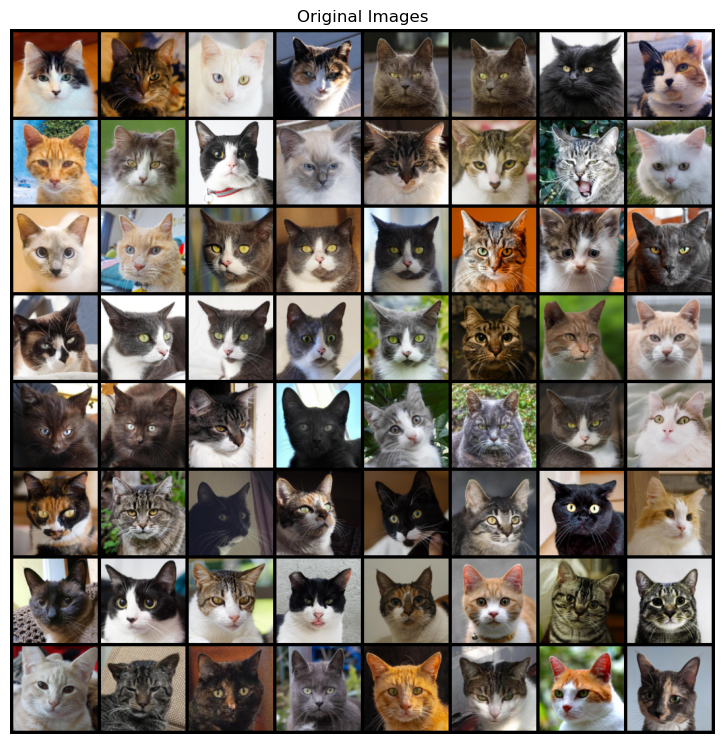

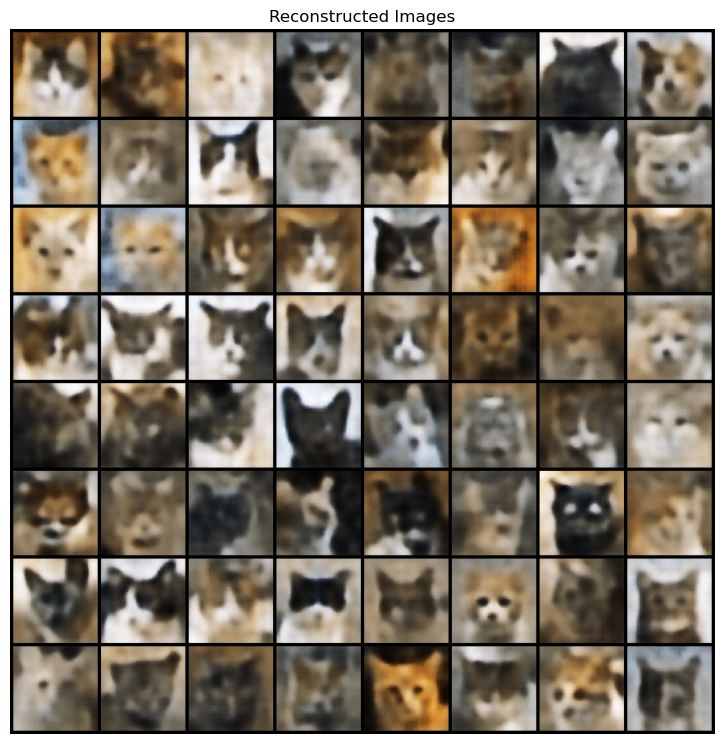

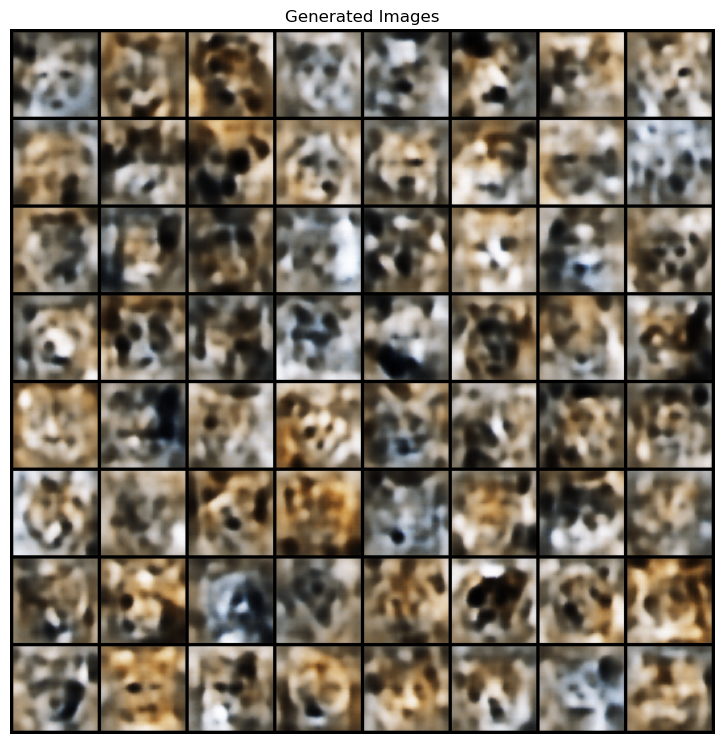

In [18]:
get_original(model)
get_reconstructed(model)
get_generated(model)

In [19]:
class MLP(nn.Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.fc1 = nn.Linear(input_size , 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, self.output_size)
        self.sf = nn.Softmax()
    
    def forward(self , x):

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)

        x = self.sf(x)

        return x


In [22]:
model_MLP = MLP(256,3).to(device)
criterion1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model_MLP.parameters(), lr=0.001)

In [23]:
N = torch.distributions.Normal(0, 1)
for epochs in range(num_epochs):
    loss = 0.0
    training_loss = 0
    model_MLP.train()
    for batchx,batchy in train_dataloader:
        
        optimizer1.zero_grad()

        batchx = batchx.to(device)
        batchy = batchy.to(device)

        input_mlp , mu , sigma = model(batchx)

        #z = mu + sigma * (N.sample(mu.shape).to(device))
        
        output = model_MLP(mu)

        loss  = criterion1(output,batchy)

        loss.backward()
        optimizer1.step()

        training_loss += loss.item()

    training_loss = training_loss/len(train_dataloader)
    
    print(f"Epoch [{epochs+1}]: Training Loss: {training_loss:.4f}")




/tmp/ipykernel_186146/813648263.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.sf(x)


Epoch [1]: Training Loss: 0.9863
Epoch [2]: Training Loss: 0.8164
Epoch [3]: Training Loss: 0.7798
Epoch [4]: Training Loss: 0.7635
Epoch [5]: Training Loss: 0.7508
Epoch [6]: Training Loss: 0.7404
Epoch [7]: Training Loss: 0.7312
Epoch [8]: Training Loss: 0.7220
Epoch [9]: Training Loss: 0.7148
Epoch [10]: Training Loss: 0.7089


In [25]:
model_MLP.eval()

val_loss = 0
total_accuracy = 0.0

for batchx , batchy  in test_dataloader:

    batchx = batchx.to(device)
    batchy = batchy.to(device)

    input_mlp , mu, sigma = model(batchx)

    #z = mu + sigma * (N.sample(mu.shape).to(device))

    output = model_MLP(mu)

    loss = criterion1(output , batchy)

    val_loss += loss.item()

    predicted = torch.argmax(output , dim = 1)

    accuracy = (batchy == predicted).sum()

    total_accuracy += accuracy

print('ACCURACY : ' , total_accuracy / len(test_dataset))

    
    

/tmp/ipykernel_186146/813648263.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.sf(x)


ACCURACY :  tensor(0.8033, device='cuda:3')


In [26]:
model_path = 'model_256_256.pth'
torch.save(model.state_dict(), model_path)

In [27]:
model_path = 'model_MLP_256_256.pth'
torch.save(model.state_dict(), model_path)